In [15]:
import numpy as np
import matplotlib.pyplot as plt
import gaussproc as gp

In [16]:
interval = (-1,2)
grid_size = 101

kernel_param = 1

max_error = 1e-5
max_iter = 15

In [17]:
def func(x):
    return -np.sin(3*x) - x**2 + 0.7*x

In [18]:
points_vector = np.array([-0.7,2.0])
func_vector = func(points_vector)

grid = np.linspace(*interval,grid_size)
post_means = np.zeros_like(grid)
post_vars = np.zeros_like(grid)

acquisition_func = np.zeros_like(grid)

prev_min = 0.0
curr_min = np.infty

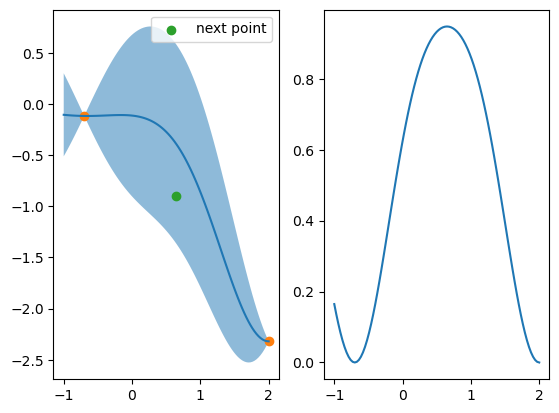

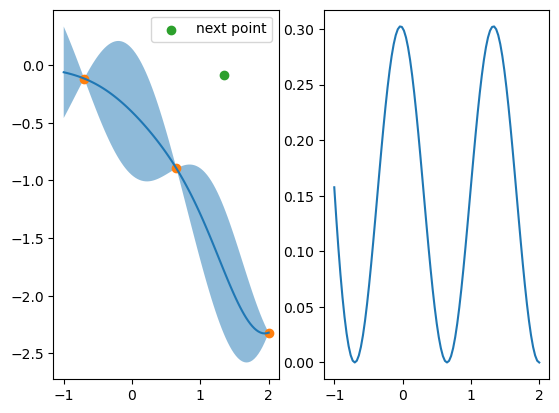

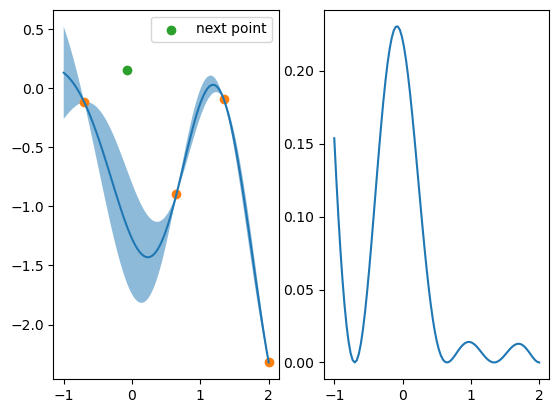

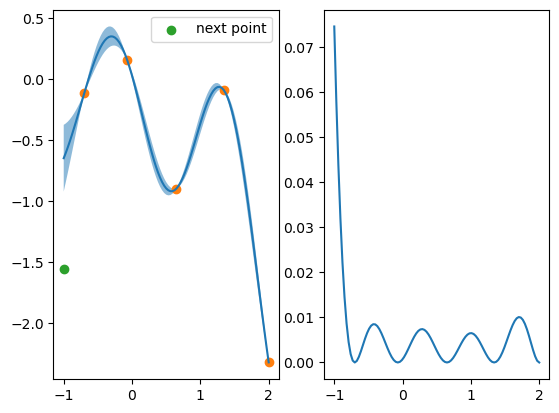

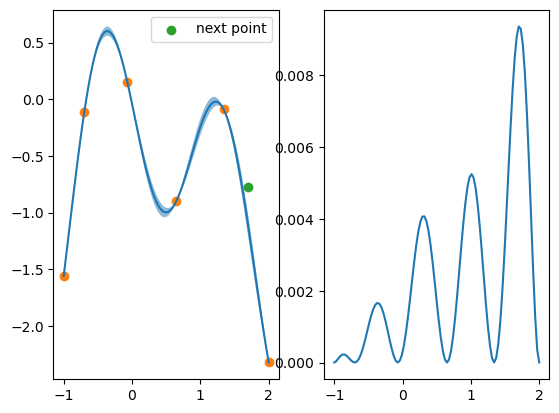

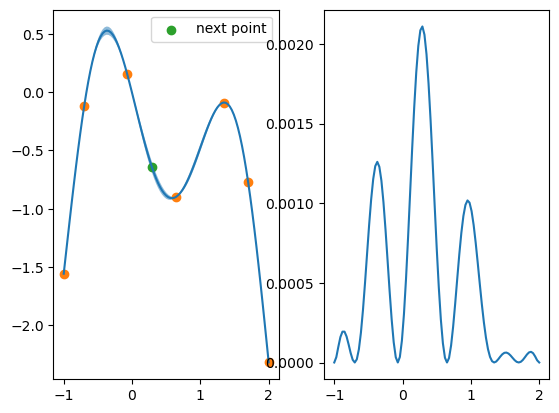

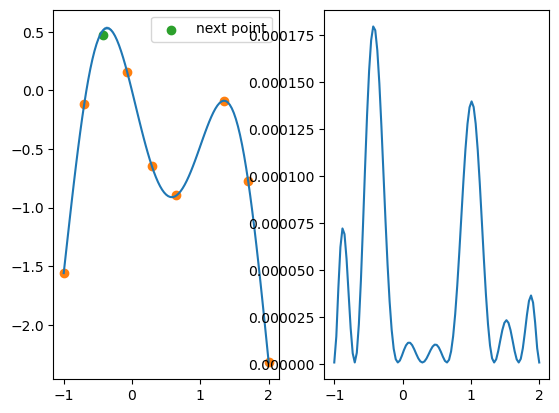

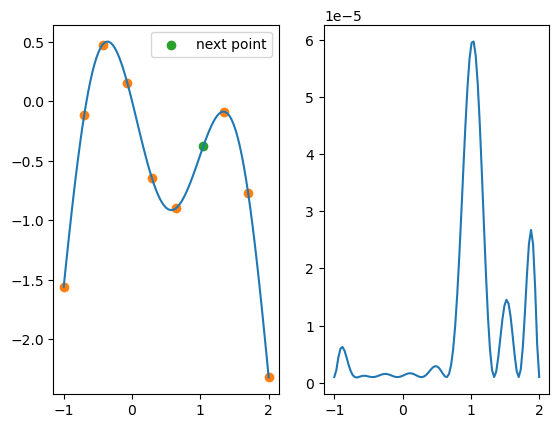

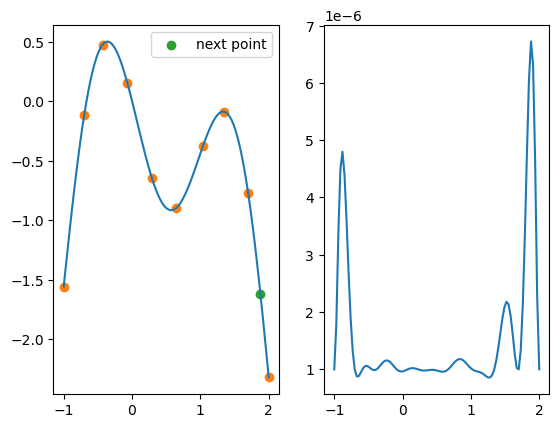

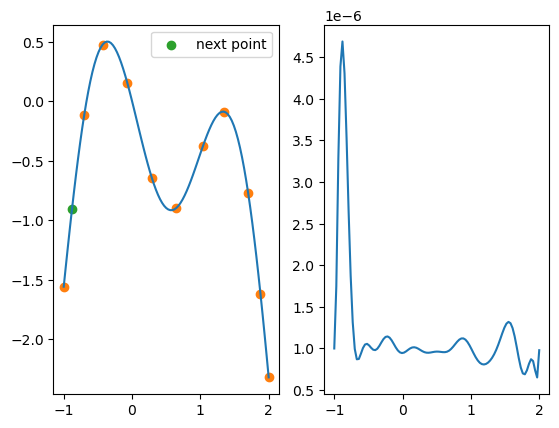

In [19]:
for _ in range(max_iter):
    if np.abs(curr_min-prev_min) <= max_error:
        break

    cov_mat = gp.cov_matrix(points_vector,kernel_param)

    for i,p in enumerate(grid):
        post_means[i] = gp.post_mean(p,points_vector,func_vector,cov_mat,kernel_param)
        post_vars[i] = gp.post_var(p,points_vector,cov_mat,kernel_param)

    post_vars = np.abs(post_vars)
    post_stds = np.sqrt(post_vars)

    next_point = grid[np.argmax(post_vars)]
    next_value = func(next_point)

    f, ax = plt.subplots(1,2)

    ax[0].fill_between(grid, post_means-post_stds, post_means+post_stds,alpha=0.5)
    ax[0].plot(grid,post_means)
    ax[0].scatter(points_vector,func_vector)
    ax[0].scatter(next_point,next_value,label="next point")
    ax[0].legend()

    ax[1].plot(grid,post_vars)

    max_var = np.max(post_vars)

    if max_var < curr_min:
        prev_min = curr_min
        curr_min = max_var

    points_vector = np.append(points_vector,next_point)
    func_vector = np.append(func_vector,next_value)

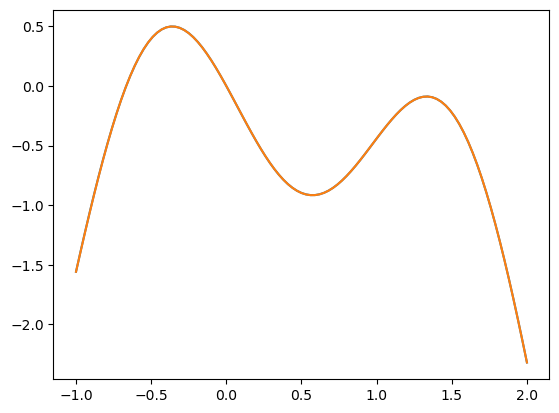

In [20]:
plt.plot(grid,func(grid))
plt.plot(grid,post_means)

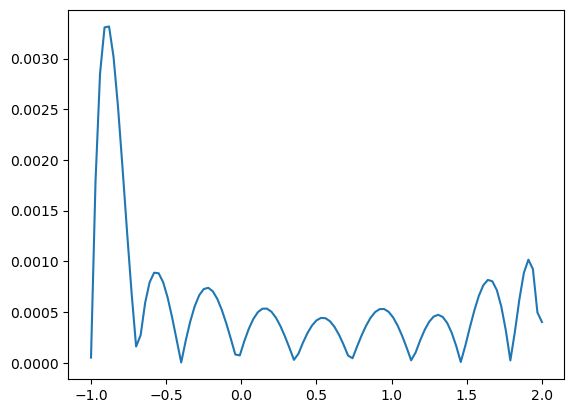

In [21]:
plt.plot(grid,np.abs(func(grid)-post_means))